<a href="https://colab.research.google.com/github/akita-NITIC/dsp/blob/main/%E3%83%87%E3%82%A3%E3%82%B8%E3%82%BF%E3%83%AB%E7%84%A1%E7%B7%9A%E9%80%9A%E4%BF%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01_自由空間伝搬損失を計算するプログラム

Interface2021年5月号p.23を参考<br>
＜参考＞https://eiseilab.com/fspl/ <br>
<br>
図1に示されるような送信アンテナから送信される電力$P_{t}$ 
と，受信アンテナで受信する電力$P_{r}$の関係は，フリスの伝達公式より，次式で表されます。
<br>
$$
\frac{P_r}{P_t}=\left(\frac{\lambda}{4\pi d}\right)^2G_tG_r
$$
ただし，$\lambda$は波長，$d$はアンテナ間の距離，$G_{t}$は送信アンテナの利得，$G_{r}$は受信アンテナの利得です。

アンテナの絶対利得を$1$（$=$等方性アンテナ，$G_t=1$，$G_r=1$）とすると，自由空間伝達利得$G$は，次式で表される。
$$
G=\frac{P_r}{P_t}=\left(\frac{\lambda}{4\pi d}\right)^2
$$
$G$の逆数を自由空間伝搬損失$L$という。
$$
L=\frac{1}{G}=\left(\frac{4\pi d}{\lambda}\right)^2
$$
$L$は，$d$の2乗に比例し，$\lambda$の2乗に反比例する。なお，$ \lambda=\frac{c}{f}$であるから，周波数$f$の2乗に比例する。
<br>
⇒　遠ければ遠いほど，周波数が高ければ高いほど損失が多くなる（より減衰する）。
<br>
また，デシベル表記の自由空間伝搬損失$L_{dB}$は，次式で表される。
<br>
$$
L_{dB}=-10log_{10}L=-10log_{10}\left(\frac{4\pi d}{\lambda}\right)^2=-20log_{10}\left(\frac{4\pi d}{\lambda}\right)
$$
⇒　マイナスは，損失（減衰）を意味している。$10log_{10}G$と考えてよい（利得を計算してマイナスになるので損失となる）。

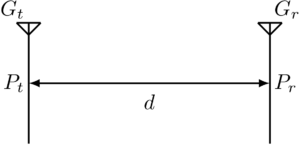
<br>
図1．送受信アンテナの位置関係



In [ ]:
!pip install japanize_matplotlib

Frequency[MHz]: 2400
Max Distance[m]: 1000


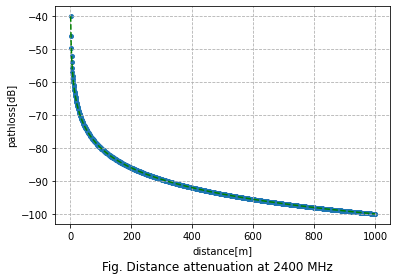

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
#import japanize_matplotlib      # 日本語フォントが使える

SPEED_OF_LIGHT = 299792458.0    # 光速[m/s]
DIV_N = 1000.0                  # 横軸データ分割数

# 減衰値計算
def CalcPathloss(freq, d):
    _lambda = SPEED_OF_LIGHT / freq             # 波長計算，lambdaは予約語なので_lambdaとした
    loss = (4.0 * np.pi * d / _lambda) **2      # 減衰値の計算
    return loss

# グラフ描画
def PlotPathloss(freq, d, loss_db):
    fig_title = "Fig. Distance attenuation at %d MHz"%(freq / (10**6))      # figureオブジェクトタイトルの内容
    fig = plt.figure()                                                      # figureオブジェクト生成，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
    plt.suptitle(fig_title, x = 0.5, y = 0)       # figオブジェクト内の指定位置（中央下部）にタイトル表示，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

    ax = fig.add_subplot(111)           # figに属するAxesオブジェクトを作成（1行1列1番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    plt.xlabel('distance[m]')           # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    plt.ylabel('pathloss[dB]')          # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    plt.grid(linestyle='--')            # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    plt.scatter(d, loss_db, s = 16)     # 散布図，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
    ## 折れ線グラフ
#    plt.plot(d, loss_db, 'b-o')         # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    ## 2次スプライン補完によるグラフ
    d1 = np.arange(dist / DIV_N, dist , dist / (DIV_N * 10))        # 補完用横軸データ
    func_ip6 = interpolate.interp1d(d, loss_db, kind="quadratic")   # 2次スプライン補完，https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d
    loss_db1 = func_ip6(d1);                                        # 補完関数で縦軸データ計算
    plt.plot(d1, loss_db1, 'g--')                                   # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

    plt.show()                  # すべてのfigureオブジェクトを表示，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show

# メイン
if __name__ == "__main__":
    ## 入力部
    print("Frequency[MHz]: ", end='')
    freq = float(input()) * 10**6
    print("Max Distance[m]: ", end='')
    dist = float(input())
    ## 演算部
    d = np.arange(dist / DIV_N, dist + dist / DIV_N, dist / DIV_N)     # 横軸データ生成，https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    loss = CalcPathloss(freq, d)        # 減衰量計算
    loss_db = -10.0 * np.log10(loss)    # 減衰量計算[dB]換算
    PlotPathloss(freq, d, loss_db)      # グラフ描画

Frequency[MHz]: 900
Max Distance[m]: 1000
 
-0.02588 x - 69.93


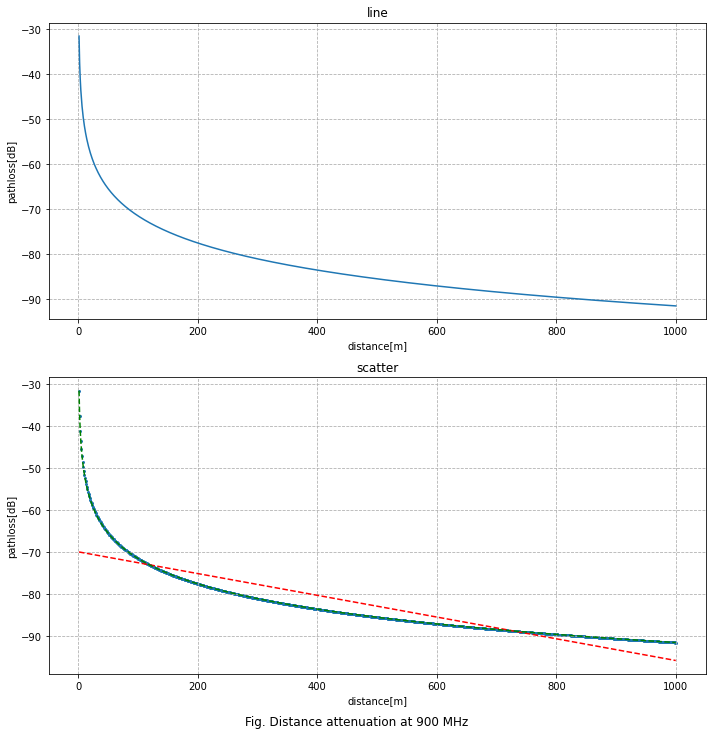

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from google.colab import files

SPEED_OF_LIGHT = 299792458.0    # 光速[m/s]
DIV_N = 1000.0                  # 横軸データ分割数

# 減衰値計算
def CalcPathloss(freq, d):
    _lambda = SPEED_OF_LIGHT / freq             # 波長計算，lambdaは予約語なので_lambdaとした
    loss = (4.0 * np.pi * d / _lambda) **2      # 減衰値の計算
    loss_db = -10.0 * np.log10(loss)            # 減衰値[dB]換算
    return loss_db

# グラフ描画
def PlotPathloss(freq, d, loss_db):
    fig_title = "Fig. Distance attenuation at %d MHz"%(freq / (10**6))      # figureオブジェクトタイトルの内容
    fig = plt.figure(figsize=(10,10))                                       # figureオブジェクト生成，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
    plt.suptitle(fig_title, x = 0.5, y = 0, fontfamily= 'sans-serif')       # figオブジェクト内の指定位置（中央下部）にタイトル表示，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

    ax1 = fig.add_subplot(211)      # figに属するAxesオブジェクトを作成（2行1列1番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    plt.title('line')               # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    plt.xlabel('distance[m]')       # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    plt.ylabel('pathloss[dB]')      # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    plt.grid(linestyle='--')        # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    plt.plot(d, loss_db, drawstyle='default')        # 折れ線グラフ，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
# グラフ練習用
    ## 散布図
    ax2 = fig.add_subplot(212)      # figに属するAxesオブジェクトを作成（2行1列2番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    plt.title('scatter')            # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    plt.xlabel('distance[m]')       # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    plt.ylabel('pathloss[dB]')      # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    plt.grid(linestyle='--')        # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
#    plt.xscale("log")
    plt.scatter(d, loss_db, s = 4)  # 散布図，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
    ## 多項式近似
    fitpoly_order = 1                                            # 近似線の多項式の次数
    coefficient_poly = np.polyfit(d, loss_db, fitpoly_order)     # 近似係数データの並び，https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html#numpy.polyfit
    func_poly = np.poly1d(coefficient_poly)                      # 多項式表現，https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html#numpy.poly1d
    print(func_poly)                                             # 近似線の多項式表示
    loss_db_l = func_poly(d)                                     # 多項式表現の式で縦軸データ計算
    plt.plot(d, loss_db_l, 'r--')                                # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    ## 補完線
    d1 = np.arange(dist / DIV_N, dist , dist / (DIV_N * 10))          # 補完用横軸データ
    func_ip6 = interpolate.interp1d(d, loss_db, kind="quadratic")     # 2次スプライン補完，https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d
    loss_db1 = func_ip6(d1);                                          # 補完関数で縦軸データ計算
    plt.plot(d1, loss_db1, 'g--')                                     # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

    plt.tight_layout()          # グラフ描画領域が重複しないようにレイアウト調整
    plt.show()                  # すべてのfigureオブジェクトを表示，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show
#    fig.savefig("test.png")     # 画像ファイル保存，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
#    files.download("test.png")  # 画像ファイルダウンロード，https://colab.research.google.com/notebooks/io.ipynb?hl=ja#scrollTo=hauvGV4hV-Mh

# メイン
if __name__ == "__main__":
    ## 入力部
    print("Frequency[MHz]: ", end='')
    freq = float(input()) * 10**6
    print("Max Distance[m]: ", end='')
    dist = float(input())
    ## 演算部
    d = np.arange(dist / DIV_N, dist + dist / DIV_N, dist / DIV_N)     # 横軸データ生成，https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    loss_db = CalcPathloss(freq, d)        # 減衰量計算
    PlotPathloss(freq, d, loss_db)         # グラフ描画

# 02_